In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import weibull_min, norm
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import StringIO

In [2]:
def vulnerability_weibull(x, alpha, beta):
    """Return vulnerability in Weibull CDF

    Args:
        x: 3sec gust wind speed at 10m height
        alpha: parameter value used in defining vulnerability curve
        beta: ditto

    Returns: weibull_min.cdf(x, shape, loc=0, scale)

    Note:

        weibull_min.pdf = c/s * (x/s)**(c-1) * exp(-(x/s)**c)
            c: shape, s: scale, loc=0

        weibull_min.cdf = 1 - exp(-(x/s)**c)

        while Australian wind vulnerability is defined as

            DI = 1 - exp(-(x/exp(beta))**(1/alpha))

        therefore:

            s = exp(beta)
            c = 1/alpha

    """
    # convert alpha and beta to shape and scale respectively
    shape = 1 / alpha
    scale = np.exp(beta)

    return weibull_min.cdf(x, shape, loc=0, scale=scale)


In [3]:
alpha = 0.29
beta = 4.3
x = np.arange(30, 100, 5)
y = norm.rvs(vulnerability_weibull(x, 0.29, 4.3), 0.02)

# curve fitting 
(see https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [4]:
popt, pcov = curve_fit(vulnerability_weibull, x, y)

In [5]:
print(popt)

[ 0.28969912  4.29934219]


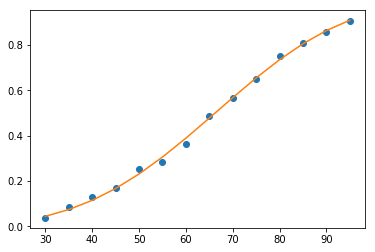

In [6]:
plt.plot(x, y, 'o',
         x, vulnerability_weibull(x, *popt), '-')

In [7]:
data_txt = StringIO.StringIO("""
 x,y
 3.00000000e+01,   1.26012776e-02
 3.50000000e+01,   1.04647208e-01
 4.00000000e+01,   7.60000772e-02
 4.50000000e+01,   1.75532660e-01
 5.00000000e+01,   2.17267675e-01
 5.50000000e+01,   2.81397933e-01
 6.00000000e+01,   3.71576297e-01
 6.50000000e+01,   4.81563805e-01
 7.00000000e+01,   5.69408574e-01
 7.50000000e+01,   6.21267003e-01
 8.00000000e+01,   7.28203012e-01
 8.50000000e+01,   8.05976384e-01
 9.00000000e+01,   8.56258048e-01
 9.50000000e+01,   9.41123476e-01
""")

In [8]:
# you can read existing file directly 
# see pandas.read_csv (https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.read_csv.html)
data = pd.read_csv(data_txt)

In [9]:
popt, pcov = curve_fit(vulnerability_weibull, x, y)

In [10]:
print(popt)

[ 0.28969912  4.29934219]
